/home/asad/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/asad/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


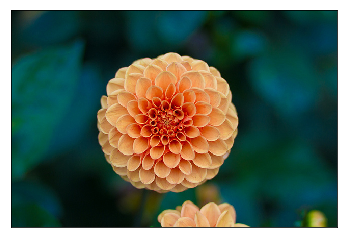

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [15]:
print("china shape :: ", china.shape)

data = china / 255.0
print("data :: \n", data)
data = data.reshape(427*640, 3)
print("data shape :: ", data.shape)

china shape ::  (427, 640, 3)
data :: 
 [[[0.00784314 0.0745098  0.05098039]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.30196078 0.25098039]
  [0.         0.29803922 0.25098039]
  [0.         0.29411765 0.24705882]]

 [[0.00392157 0.07058824 0.04705882]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.         0.29803922 0.25098039]
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.25490196]]

 [[0.00784314 0.06666667 0.04705882]
  [0.02352941 0.0745098  0.04705882]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.2627451 ]
  [0.00392157 0.29019608 0.2627451 ]]

 ...

 [[0.         0.18039216 0.15686275]
  [0.00392157 0.18823529 0.15686275]
  [0.00392157 0.18431373 0.14509804]
  ...
  [0.01960784 0.17254902 0.10196078]
  [0.02352941 0.16862745 0.10196078]
  [0.02745098 0.17254902 0.10588235]]

 [[0.         0.18431373 0.1607843

In [17]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1,2,figsize=(16, 6))
    ax[0].scatter(R,G, color=colors, marker='.')
    ax[0].set(xlabel="Red", ylabel="Green", xlim=(0,1), ylim=(0, 1))
    
    ax[1].scatter(R,B, color=colors, marker=".")
    ax[1].set(xlabel="Red", ylabel="Blue", xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

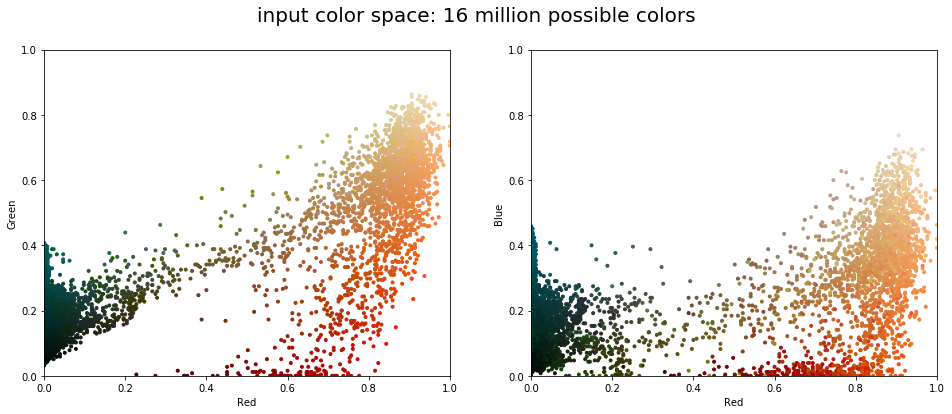

In [18]:
plot_pixels(data, title="input color space: 16 million possible colors")

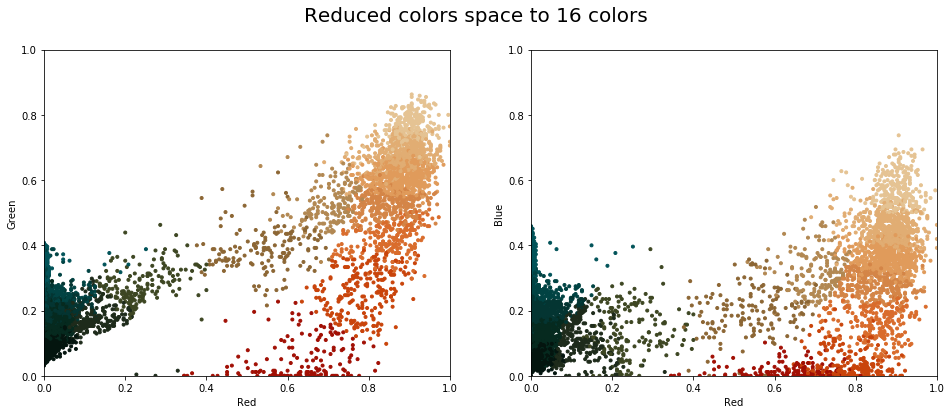

In [21]:
import warnings; warnings.simplefilter("ignore")

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced colors space to 16 colors")

Text(0.5,1,'16-colors image')

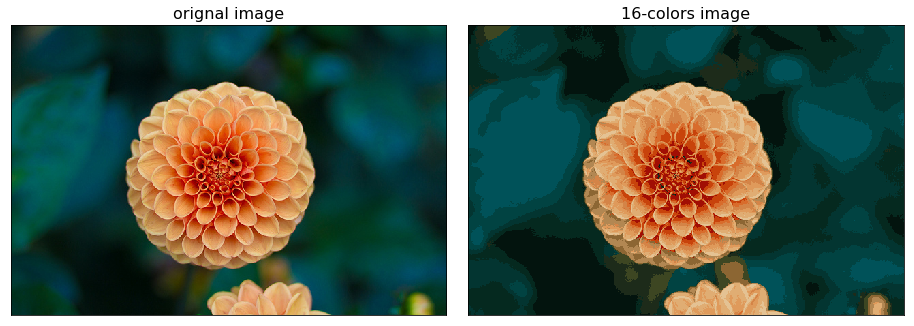

In [22]:
china_recolored = new_colors.reshape(china.shape)
fig, ax= plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("orignal image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-colors image", size=16)